# SD201 : MINING OF LARGE DATASETS

## MUSIC GENRE CLASSIFICATION USING SONG LYRICS

In [31]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

### 1. CONSTRUCTION OF THE DATASET

The source of the dataset is a csv file : a result of a scrapping work through [GENIUS](https://genius.com/).

#### 1.1 ROW DATA DESCRIPTION

In [91]:
# loading the dataset from csv file
data = pd.read_csv("lyrics.csv", sep='#')

In [93]:
# columns of dataset
data.columns

Index(['artist', 'title', 'lyrics', 'genre', 'url'], dtype='object')

In [94]:
# inspecting the content of the dataset
data.head()

,artist,title,lyrics,genre,url
0,Eminem,Rap God,"Rap God Lyrics\r\n""Look, I was gonna go easy o...",rap,https://genius.com/Eminem-rap-god-lyrics
1,Cardi B,WAP,WAP Lyrics\r\nWhores in this house\r\nThere's ...,rap,https://genius.com/Cardi-b-wap-lyrics
2,Kendrick Lamar,HUMBLE.,HUMBLE. Lyrics\r\nNobody pray for me\r\nIt bee...,rap,https://genius.com/Kendrick-lamar-humble-lyrics
3,Migos,Bad and Boujee,"Bad and Boujee Lyrics\r\nYou know, young rich ...",rap,https://genius.com/Migos-bad-and-boujee-lyrics
4,Drake,God's Plan,God’s Plan Lyrics\r\nAnd they wishin' and wish...,rap,https://genius.com/Drake-gods-plan-lyrics


In [95]:
# size of the dataset
data.shape

(6858, 5)

In [96]:
# types of data 
data.dtypes

artist    object
title     object
lyrics    object
genre     object
url       object
dtype: object

#### 1.2 DATA CLEANING

In [35]:
#Missing values
data.isna().sum()[data.isna().sum() > 0]

lyrics    25
dtype: int64

In [36]:
# Deleting rows with missing values
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [37]:
#Check missing values (check is dropping went right)
data.isna().sum()


artist    0
title     0
lyrics    0
genre     0
url       0
dtype: int64

In [74]:
#deleting the "[title]-Lyrics" from the beginning of each lyrics and "[number xxx]Embed from the end"
for i in range(0,len(data['lyrics'])):
    if(re.findall(r'\d+.*Embed.*', data['lyrics'][i])!=[]):
        data['lyrics'][i] = data['lyrics'][i].split(re.findall(r'\d+.*Embed.*', data['lyrics'][i])[0])[0]
    if (re.findall(r'\bLyrics\b', data['lyrics'][i])!=[]):
        data['lyrics'][i] = data['lyrics'][i].split('Lyrics')[1]
    

In [77]:
#Checking the data cleaning on a random song lyrics
print(data['lyrics'][212])


Right about now, N.W.A court is in full effect
Judge Dre presiding
In the case of N.W.A versus the Police Department
Prosecuting attorneys are MC Ren, Ice Cube
And Eazy-motherfucking-E
Order, order, order!
Ice Cube, take the motherfucking stand
Do you swear to tell the truth, the whole truth
And nothing but the truth so help your black ass?
You goddamn right
Well, won't you tell everybody what the fuck you gotta say?

Fuck the police comin' straight from the underground
A young nigga got it bad 'cause I'm brown
And not the other color, so police think
They have the authority to kill a minority
Fuck that shit, 'cause I ain't the one
For a punk motherfucker with a badge and a gun
To be beating on and thrown in jail
We can go toe-to-toe in the middle of a cell
Fuckin' with me 'cause I'm a teenager
With a little bit of gold and a pager
Searchin' my car, lookin' for the product
Thinkin' every nigga is sellin' narcotics
You'd rather see me in the pen
Than me and Lorenzo rollin' in a Benz-o


Number of songs grouped by genre of music: genre
country     119
hip-hop    1000
jazz        979
metal       996
pop         739
r-b        1000
rap        1000
rock       1000
Name: lyrics, dtype: int64


<AxesSubplot:>

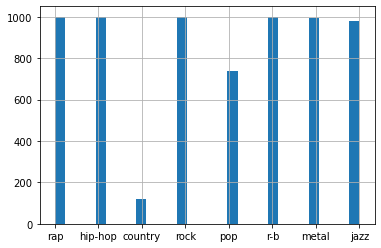

In [85]:
print("Number of songs grouped by genre of music:",data.groupby('genre').count()['lyrics'])
data['genre'].hist(bins=30)

### 2. DATA MODELING

#### 2.1 PREPROCESSING

### 3. RESULTS